# PCA Project HW- Red and White Wine Combined Datasets
## Mohamed R Helayhel
1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using PCA, data cleaning, data standardization, and dealing with outlier values.
4. Split the data into Train and Test and build and evaluate the first Model
5. Perform Model Improvement techniques and predict Test Data
6. Choose the best model and discuss the results.

In [27]:
#Import required packages
import numpy as np
import numpy.matlib as npmtlb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

## 1-Define the Research problem and questions
The Dataset was retrieved from UCI Machine Learning Repository (Link: https://archive.ics.uci.edu/ml/datasets/wine+quality)

### Description
#### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine, reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

#### These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Question to answer
##### Use the all or some of the attributes to determine the whether it is Red Wine or White Wine. (Classification)
##### Red Wine will be class 0 and White Wine will be class 1


In [28]:
# Read the data, print the shape and first 5 rows.
wineQualityRed = pd.read_csv("winequality-red.csv",sep=';', engine='python')
wineQualitywhite = pd.read_csv("winequality-white.csv",sep=';', engine='python')
print('Red Wine:',wineQualityRed.shape)
print(wineQualityRed.head())

print('White Wine:',wineQualitywhite.shape)
print(wineQualitywhite.head())

frames=[wineQualityRed,wineQualitywhite]
wineDataset = pd.concat(frames)

print('All Wines:',wineDataset.shape)
print(wineDataset.head())

Red Wine: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  

In [29]:
#Add class column for color, where Red Color is 0 and White Color is 1
redWineColor=npmtlb.repmat(0,1599,1)
whiteWineColor=npmtlb.repmat(1,4898,1)
color=np.concatenate((redWineColor[:,0],whiteWineColor[:,0]))
wineDataset['color'] = color.tolist()
print(wineDataset.shape)
print(wineDataset.head(-1))

(6497, 13)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4892            6.5              0.23         0.38             1.3      0.032   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   

      free sulfu

## Comments
#### The data includes thirteen variables, where 12 are to be used as predictors and the 'color' is the output. We see that there are about 4x as many red white wine observations when compared to white wine, but they both are 1.5k+ observations, so we can trust the output of the accuracy metric in the subsequent analysis

## 2-Analyze data by descriptive statistics and graphical visualization.

In [30]:
# Print the summary of the data

print(wineDataset.describe())
print(wineDataset.describe().T)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [31]:
# Print the datatypes which are keys.
types = wineDataset.dtypes
print(types)
print("Keys of wine color dataset:\n", wineDataset.keys())

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                     int64
dtype: object
Keys of wine color dataset:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


In [32]:
# print the target variable
# Labels: 0 as red, 1 is white.
print("color:", wineDataset['color'])

color: 0       0
1       0
2       0
3       0
4       0
       ..
4893    1
4894    1
4895    1
4896    1
4897    1
Name: color, Length: 6497, dtype: int64


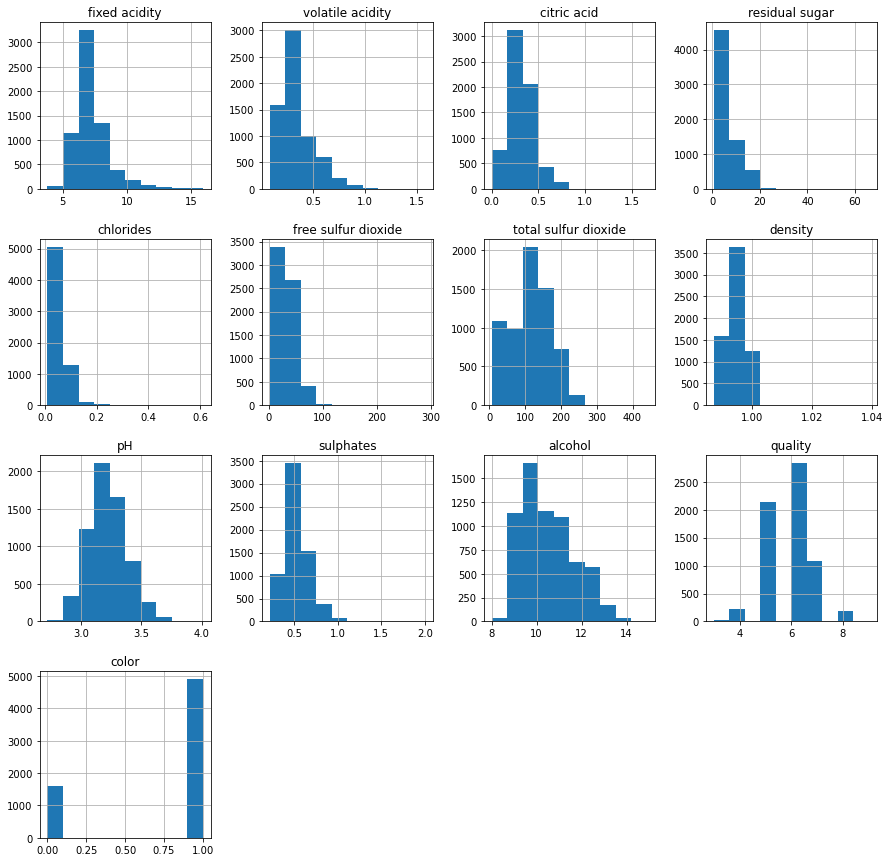

In [33]:
# Create the histogram of all the variables.

%matplotlib inline
wineDataset.hist(figsize = (15,15))
plt.show()

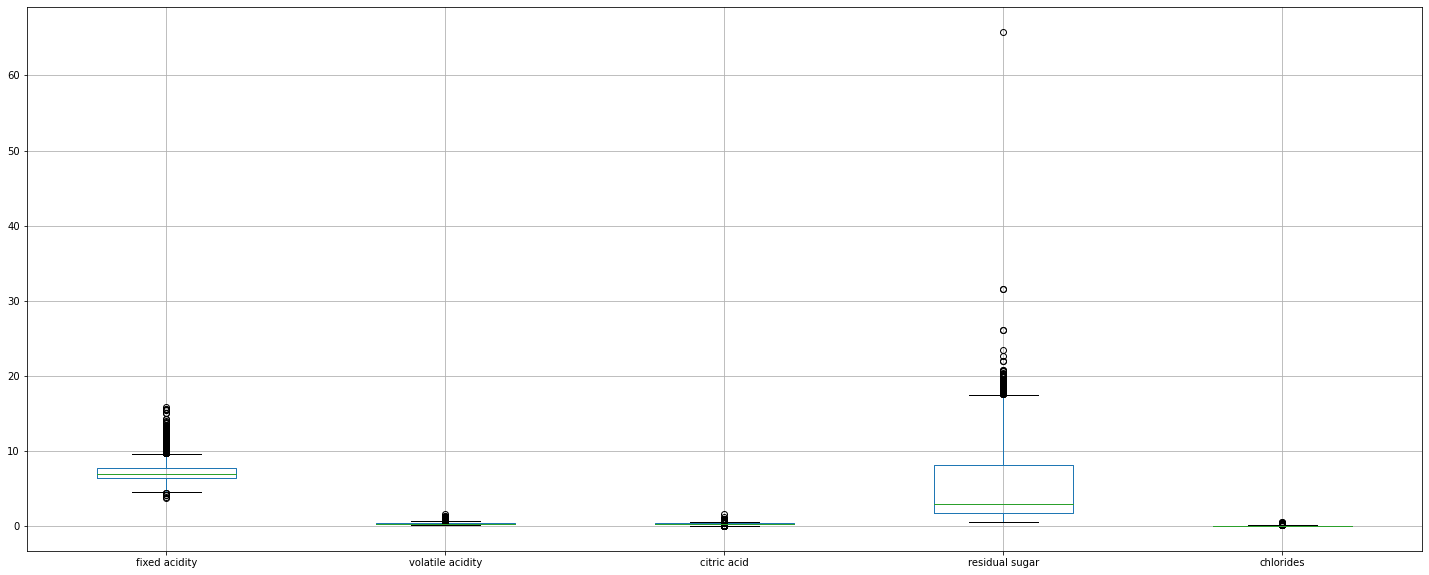

In [34]:
# create a grid of boxplot
%matplotlib inline
X=wineDataset.iloc[:,0:12]
y = wineDataset.iloc[:,12]
colX=list(wineDataset.columns)
boxplot = wineDataset.boxplot(column=colX[0:5],figsize = (25,10))

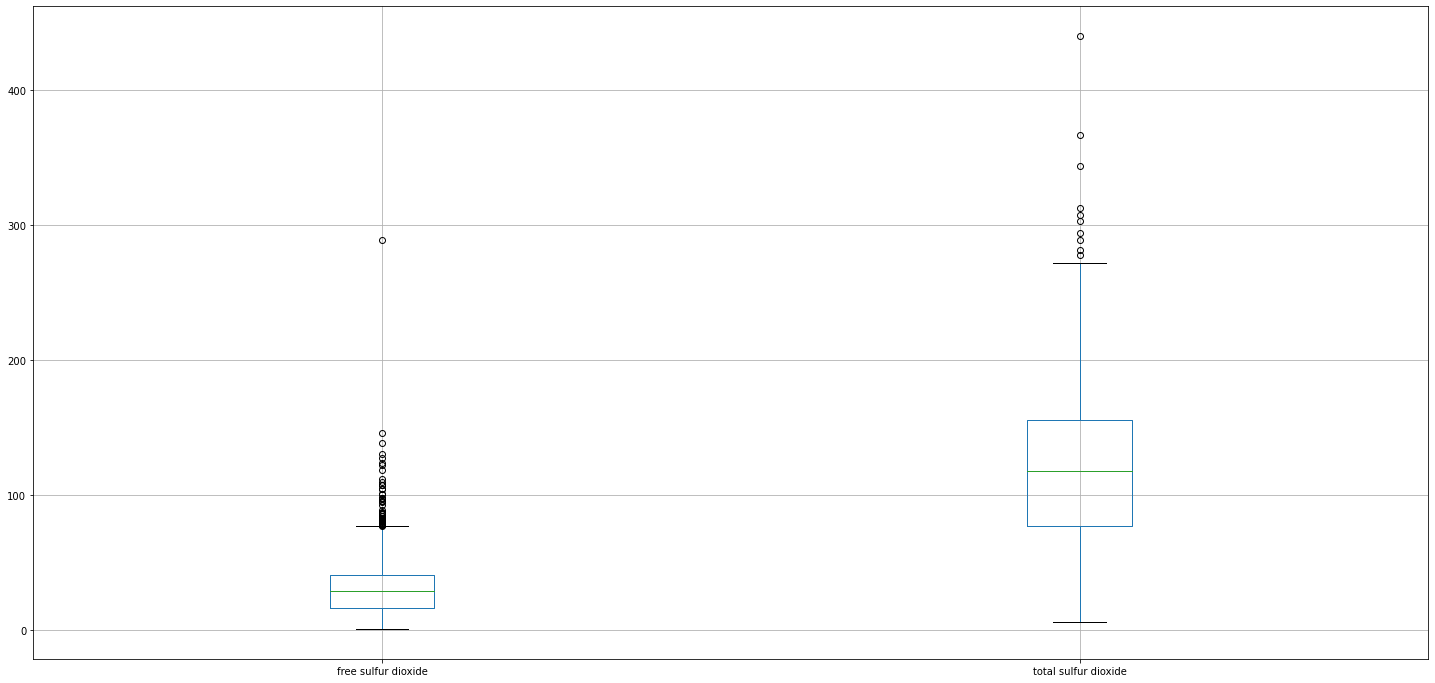

In [35]:
Secondboxplot = wineDataset.boxplot(column=colX[5:7],figsize = (25,12))

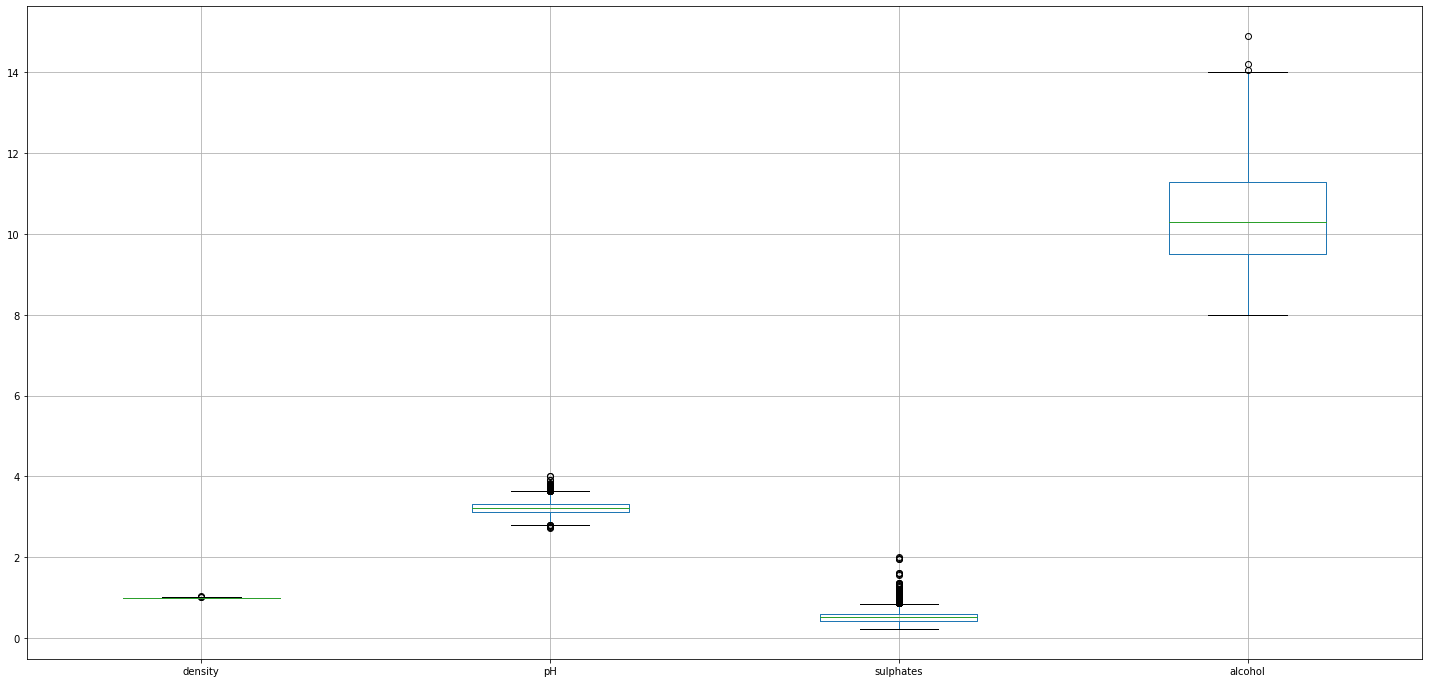

In [36]:
Thirdboxplot = wineDataset.boxplot(column=colX[7:11],figsize = (25,12))

<AxesSubplot:>

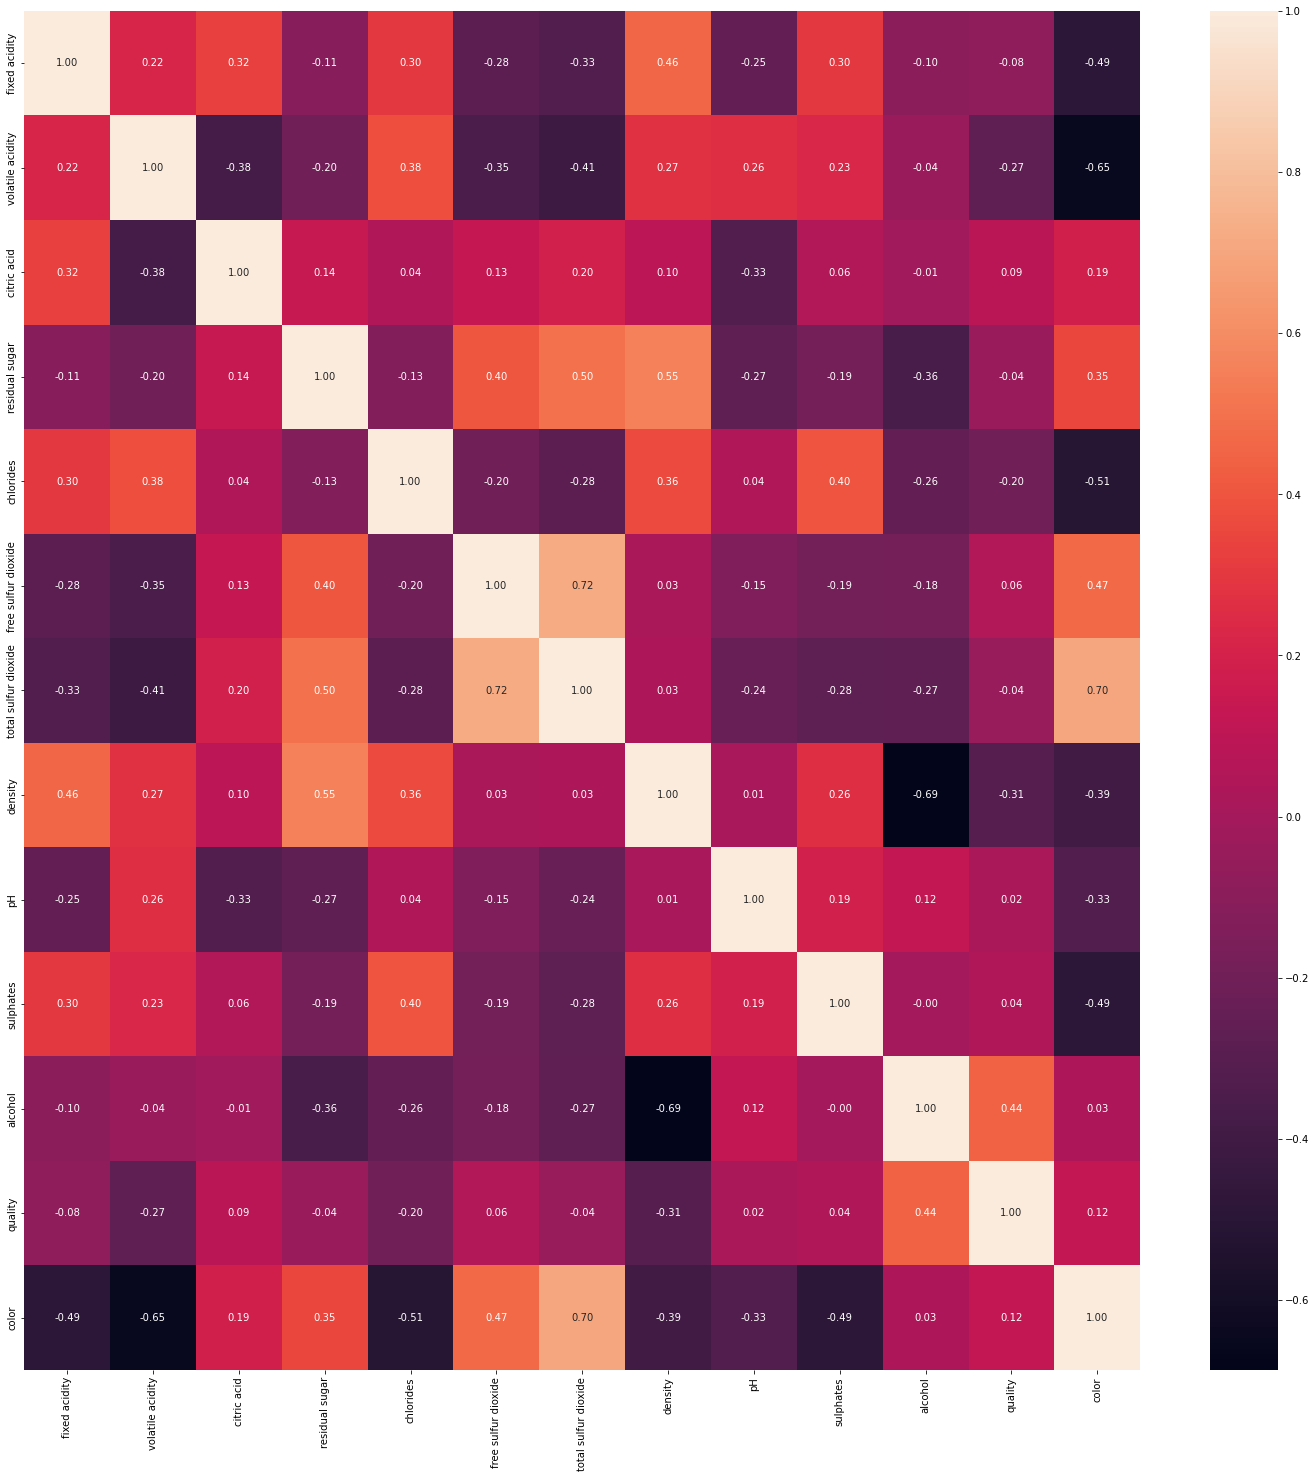

In [37]:
# Viewing Correlation coefficients using a heatmap
plt.figure(figsize=(25,25))
sns.heatmap(wineDataset.corr(),annot=True,fmt='.2f')

## Comments
#### Looking at the historgram of all the variables. We see that that most do not have a normal distrubition. And the boxplots show that most predictor variables include outliers, and since for PCA, the method is to account for the variance of each component by eigenvalues, eliminating outliers might be helpful in oder to get more accurate results. 
#### We also see using the pearson correlation matrix that several of our predictor features are correlated weakly, moderately and strongly, and PCA identifies and resolves issues of inter-correlations between the variables.



## 3- Prepare data by using PCA, data cleaning, data standardization, and dealing with outlier values.

[0.29492412 0.20484445 0.12627433 0.08311596 0.06536559 0.05083677
 0.04407412 0.04007519 0.03618948 0.02352702 0.01975193 0.00917425
 0.00184679]
    0    1    2    3    4    5    6    7    8    9    10   11   12
0  0.0  2.0 -2.0 -1.0  1.0 -1.0 -1.0  1.0  2.0  0.0 -1.0 -1.0 -2.0
1  0.0  3.0 -2.0 -1.0  1.0 -0.0 -1.0  1.0 -0.0  1.0 -1.0 -1.0 -2.0
2  0.0  3.0 -2.0 -1.0  1.0 -1.0 -1.0  1.0  0.0  1.0 -1.0 -1.0 -2.0
3  3.0 -0.0  2.0 -1.0  1.0 -1.0 -1.0  1.0 -0.0  0.0 -1.0  0.0 -2.0
4  0.0  2.0 -2.0 -1.0  1.0 -1.0 -1.0  1.0  2.0  0.0 -1.0 -1.0 -2.0
[[ 7.  1. -0. ...  9.  5. -0.]
 [ 8.  1. -0. ... 10.  5. -0.]
 [ 8.  1.  0. ... 10.  5. -0.]
 ...
 [ 7.  0.  0. ...  9.  6.  1.]
 [ 6.  0.  0. ... 13.  7.  1.]
 [ 6.  0.  0. ... 12.  6.  1.]]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


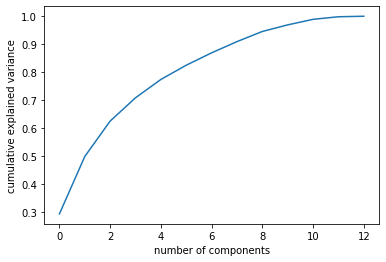

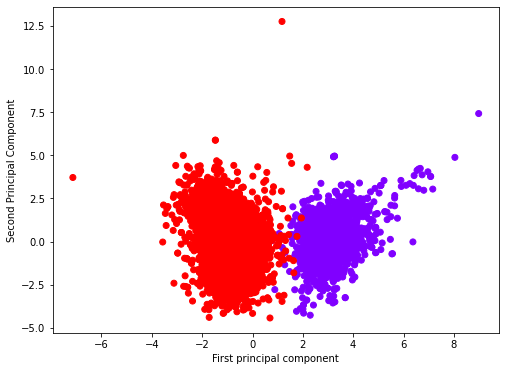

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wineDataset)

scaled_data = scaler.transform(wineDataset)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#scaled_data.shape

#x_pca.shape

pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=wineDataset['color'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


#print(pca.components_)
#print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
df_orig = pca.inverse_transform(x_pca)
print(pd.DataFrame(df_orig).round().head())
x = scaler.inverse_transform(df_orig).round()
print(x)
wineDataset.head()
#print(head(df_orig))


## Comments
#### PCA shows very encouraging results where we can see a clear distinction between the colors on the first principle component. However, the usage of two components from our predictors is not enough to explain ~80% of the variation, so we may require to use more components in the predictive model later on to get better accuracy.
#### We also notice that there are a bunch of outliers on both axes, therefore it is better to repeat the analysis with these eliminated.

In [39]:
#filtered Winedata set based on Z score (all data in parameters should be within 3 std devs of their respective mean)
from scipy import stats
filteredWineDataset=wineDataset[((np.abs(stats.zscore(wineDataset))) < 3).all(axis=1)]
print(filteredWineDataset.shape)

(5989, 13)


[0.30626885 0.21314845 0.11536905 0.08895035 0.06173717 0.04856176
 0.04292868 0.03776451 0.03129281 0.02378635 0.01980953 0.00901541
 0.00136708]
    0    1    2    3    4    5    6    7    8    9    10   11   12
0  0.0  3.0 -2.0 -1.0  1.0 -1.0 -2.0  1.0  2.0  0.0 -1.0 -1.0 -2.0
1  1.0  3.0 -2.0 -1.0  2.0 -1.0 -1.0  1.0  0.0  1.0 -1.0 -1.0 -2.0
2  0.0  3.0 -2.0 -1.0  1.0 -1.0 -2.0  1.0  2.0  0.0 -1.0 -1.0 -2.0
3  0.0  2.0 -2.0 -1.0  1.0 -1.0 -1.0  1.0  2.0  0.0 -1.0 -1.0 -2.0
4  1.0  2.0 -2.0 -1.0  1.0 -1.0 -1.0  1.0  1.0 -0.0 -1.0 -1.0 -2.0
[[ 7.  1.  0. ...  9.  5. -0.]
 [ 8.  1.  0. ... 10.  5. -0.]
 [ 7.  1.  0. ...  9.  5. -0.]
 ...
 [ 6.  0.  0. ...  9.  6.  1.]
 [ 5.  0.  0. ... 13.  7.  1.]
 [ 6.  0.  0. ... 12.  6.  1.]]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0


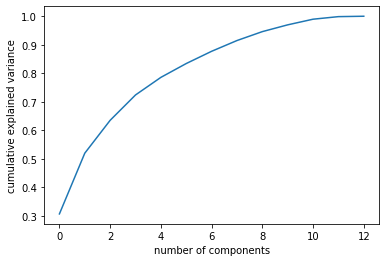

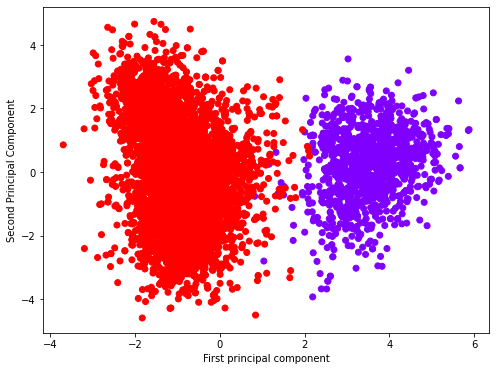

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(filteredWineDataset)

scaled_data = scaler.transform(filteredWineDataset)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#scaled_data.shape

#x_pca.shape

pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=filteredWineDataset['color'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


#print(pca.components_)
#print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
df_orig = pca.inverse_transform(x_pca)
print(pd.DataFrame(df_orig).round().head())
x = scaler.inverse_transform(df_orig).round()
print(x)
filteredWineDataset.head()
#print(head(df_orig))


## Comments
#### We do notice that the axis for both components shrink down from [-6,8] to [-4,6] for PC1 and from [-5,12.5] to [-4,4] with the elimination of outliers using the Z score method. We also notice a slight improvement in the ability of the first two components to explain variation (~2% improvement approx) but it is still less than the desired amount, so the usage of more components is expected to improve outcomes

## 4- Split the data into Train and Test and build and evaluate the first Model

In [41]:
from sklearn.model_selection import train_test_split


X = wineDataset
X = X.iloc[:,0:12]
#print(X)

y = wineDataset['color']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('TThe accuracy percent is',accuracy_score(y_test, y_pred)*100,'%')

[[301  10]
 [ 14 975]]
TThe accuracy percent is 98.15384615384616 %


## Comments
#### The results of the first model are encouraging. It shows that the semi-supervised learning method using PCA and RandomForest is capable of accurately predicting the wine color using its chemical formulation, as we are limited to a total of 24 total false positives and false negatives out of 1300 total predictions on the original dataset (including outliers) with 2 pca components and a 80-20% Train- Test split. 
#### Future optimization techniques such as outlier elimination, tuning the number of pca components, and feature selection could further improve the model

## 5- Perform Model Improvement techniques and predict Test Data

### 5-A Outlier Elimination

In [42]:
from sklearn.model_selection import train_test_split


X = filteredWineDataset
X = X.iloc[:,0:12]
#print(X)

y = filteredWineDataset['color']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('TThe accuracy percent is',accuracy_score(y_test, y_pred)*100,'%')

[[231   9]
 [ 10 948]]
TThe accuracy percent is 98.41402337228715 %


## Comments
#### The elimination of outliers improved the model, as expected given what we saw in the histograms and the reliance of PCA on variance and linear combinations. The test accuracy increased from 98.15 to 98.41% for the same random state despite utilizing less training samples for the model.

### 5-B Hyperparameter Tuning

In [43]:
from sklearn.model_selection import train_test_split


X = filteredWineDataset
X = X.iloc[:,0:12]
#print(X)

y = filteredWineDataset['color']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('TThe accuracy percent is',accuracy_score(y_test, y_pred)*100,'%')

[[231   9]
 [  9 949]]
TThe accuracy percent is 98.49749582637729 %


In [44]:
from sklearn.model_selection import train_test_split


X = filteredWineDataset
X = X.iloc[:,0:12]
#print(X)

y = filteredWineDataset['color']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('TThe accuracy percent is',accuracy_score(y_test, y_pred)*100,'%')

[[231   9]
 [  8 950]]
TThe accuracy percent is 98.58096828046745 %


In [45]:
from sklearn.model_selection import train_test_split


X = filteredWineDataset
X = X.iloc[:,0:12]
#print(X)

y = filteredWineDataset['color']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('TThe accuracy percent is',accuracy_score(y_test, y_pred)*100,'%')

[[225  15]
 [  6 952]]
TThe accuracy percent is 98.24707846410683 %


## Comments
#### We notice that tuning the number of components impacts the test accuracy. Using 4 PCA components slighty improved the accuracy from using 2 in the first model, and using 5 further improved the test accuracy to a new high of 98.58%.
#### However, using 7 PCA components reduced the test accuracy to the lowest % yet with the filtered dataset, so the inclusion of more PCA parameters may be more computationally heavy while also decreasing model accuracy due to potential complex issues such as some predictors not being linear or having multicollinearity issues, etc.

### 5- C Feature Importance and Selection 

In [46]:
# feature selection

#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = filteredWineDataset.iloc[:,0:12]  #independent columns
y = filteredWineDataset.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif,k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

                   Specs        Score
4              chlorides  5274.074004
6   total sulfur dioxide  5241.141278
1       volatile acidity  4515.222512
9              sulphates  1650.062769
5    free sulfur dioxide  1618.385169
0          fixed acidity  1460.587427
8                     pH   959.676658
7                density   884.285387
3         residual sugar   774.446860
2            citric acid   450.316940
11               quality    79.640484
10               alcohol     6.339307


In [47]:
from sklearn.model_selection import train_test_split


X = filteredWineDataset
X=filteredWineDataset[['total sulfur dioxide','chlorides','volatile acidity','sulphates','free sulfur dioxide']]
#print(X)

y = filteredWineDataset['color']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('TThe accuracy percent is',accuracy_score(y_test, y_pred)*100,'%')

[[231   9]
 [ 19 939]]
TThe accuracy percent is 97.66277128547578 %


## Comments
#### Using the 5 features only that were ranked based on the SelectKBest method negatively impacted the test accuracy of the model. We can see that the 6th best ranked predictor had a very close score to the 5th best, so this shows that they were close in their importance and require us to use more predictors to regain the level of accuracy previously attained.

[0.33027865 0.27041421 0.22472019 0.09451452 0.08007243]


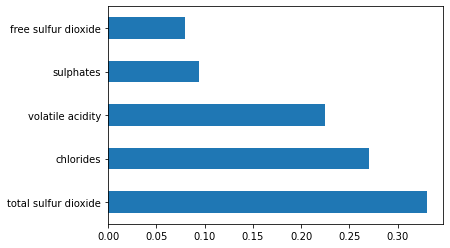

In [48]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split


X = filteredWineDataset
X=filteredWineDataset[['total sulfur dioxide','chlorides','volatile acidity','density','residual sugar']]
#print(X)

y = filteredWineDataset['color']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('TThe accuracy percent is',accuracy_score(y_test, y_pred)*100,'%')

[[229  11]
 [ 12 946]]
TThe accuracy percent is 98.08013355592654 %


In [50]:
from sklearn.model_selection import train_test_split


X = filteredWineDataset
X = X.iloc[:,0:10]
print(X)

y = filteredWineDataset['color']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('TThe accuracy percent is',accuracy_score(y_test, y_pred)*100,'%')

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
2               7.8              0.76         0.04             2.3      0.092   
4               7.4              0.70         0.00             1.9      0.076   
5               7.4              0.66         0.00             1.8      0.075   
6               7.9              0.60         0.06             1.6      0.069   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

## Comments
#### Using ExtraTreesClassification, we see that the method gave out a different top 5 from selectKBest, and the test accuracy using 5 features was also lower than the one attained with all predictors. 
#### However, both feature ranking methods agreed that 'quality' and 'alcohol' are the least important feature variables, and we do notice that we attain our best performance after their removal. 

## 6-Choose the best model and discuss the results.


In [51]:
from sklearn.naive_bayes import GaussianNB

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

train_scores=classifier.score(X_train,y_train)
test_scores=classifier.score(X_test,y_test)

print('The train score is:',train_scores*100,'%')
print('The test score is:',test_scores*100,'%')


The train score is: 98.66416197036109 %
The test score is: 98.8313856427379 %


In [52]:
## Error Rate
from sklearn.naive_bayes import GaussianNB

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

prediction = classifier.predict(X_test)
error=np.mean(prediction!=y_test)
print('The Test Error for our Best model in percent is ',error*100,'%')

The Test Error for our Best model in percent is  1.1686143572621035 %


## Conclusion
#### The use of PCA for Exploratory Data Analysis is a powerful tool, as it was able to find clusters within our dataset based on the color of the wine on the first Principal component axis.
#### The elimination of outliers from the data had an impact on the PCA explained variation ratio, as well as as a significant reduction in the axes ranges for both Principal components and better visibility to the separation between the clusters. This result is not surprising given the way that PCA works based on variance and linear combinations.
#### Performance improvement methods such as outlier filtering, tuning number of PCA components, feature ranking and selection helped improve model accuracy
#### The use of a semi-supervised learning technique between PCA and RandomForest provided accurate classification results with a best model test accuracy of 98.83% and a test error of 1.17% with a test-train split of 80-20 of the data using 10 out of 12 predictors and n=5 PCA components.
